In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1999-01-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.061413,0.0000,0.742285,0.734467,0.911793,0.896788,0.754677,0.726411,1.000000,0.981686,0.786902,0.725754,0.739139,0.398443,3.0
1,1999-02-28 00:00:00,1.00000,#VALUE!,#VALUE!,0.822168,0.8923,1.000000,1.000000,1.000000,1.000000,0.977482,0.950245,1.000000,1.000000,0.917165,0.888962,0.853224,0.502272,3.0
2,1999-03-31 00:00:00,1.00000,#VALUE!,#VALUE!,1.000000,1.0000,0.887461,0.894749,0.846522,0.876495,0.966473,0.916707,1.000000,1.000000,0.818541,0.754026,0.815425,0.469207,3.0
3,1999-04-30 00:00:00,0.91866,#VALUE!,#VALUE!,1.000000,1.0000,0.756134,0.787182,0.649044,0.635819,0.917259,0.875811,0.969175,0.952241,0.682769,0.549867,0.734817,0.375368,3.0
4,1999-05-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.043678,0.0000,0.331229,0.325447,0.536516,0.486732,0.699631,0.662173,0.737502,0.687860,0.570753,0.362783,0.542768,0.190791,3.0


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              221 non-null    object 
 1   OAS                               205 non-null    float64
 2   Excess Return % 3-mo (Treasury)   221 non-null    float64
 3   Excess Return % 3-mo (Agg)        221 non-null    float64
 4   Excess Return % 6-mo (Treasury)   221 non-null    float64
 5   Excess Return % 6-mo (Agg)        221 non-null    float64
 6   Excess Return % 9-mo (Treasury)   221 non-null    float64
 7   Excess Return % 9-mo (Agg)        221 non-null    float64
 8   Excess Return % 12-mo (Treasury)  221 non-null    float64
 9   Excess Return % 12-mo (Agg)       221 non-null    float64
 10  Excess Return % 24-mo (Treasury)  221 non-null    float64
 11  Excess Return % 24-mo (Agg)       221 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6786769296


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.801627,0.574565,0.516959,0.603023,0.504556,0.604966,0.490998,0.588132,0.452058,0.552979,0.362894,0.632225,0.396666,3.161290
std,0.089356,0.273474,0.300542,0.307843,0.363760,0.273750,0.329836,0.302312,0.368555,0.243993,0.360582,0.259268,0.345999,0.860108
min,0.680674,0.000000,0.000000,0.123037,0.000000,0.129939,0.000000,0.130558,0.000000,0.088057,0.000000,0.190742,0.000000,2.000000
25%,0.738922,0.386984,0.272790,0.371489,0.220161,0.373567,0.209882,0.346922,0.130677,0.367628,0.007998,0.441994,0.121897,2.000000
50%,0.793842,0.611196,0.540101,0.598647,0.424561,0.518275,0.386185,0.497411,0.291045,0.492669,0.268272,0.612914,0.303753,3.000000
75%,0.869565,0.762103,0.726624,0.892438,0.861271,0.860329,0.810644,0.918848,0.823231,0.726327,0.615999,0.854297,0.685387,4.000000
max,0.983566,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 3-mo (Treasury)  31.0  0.574565  0.273474  0.049117   
 2                         combined  62.0  0.688096  0.231966  0.029460   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.474254  0.674876  
 2   0.629187  0.747004  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2271
 1                              Degrees of freedom =   60.0000
 2                                               t =    4.3942
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1161
 7                                       Hedge's g =    1.1021
 8                        

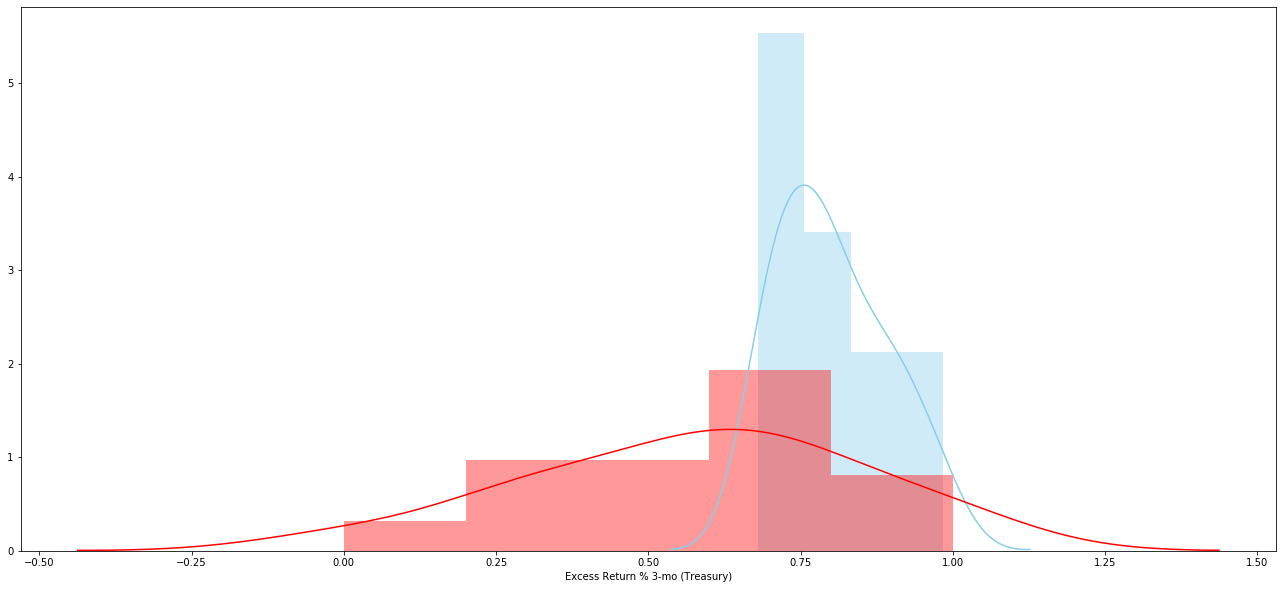

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 3-mo (Agg)  31.0  0.516959  0.300542  0.053979   0.406719   
 2                    combined  62.0  0.659293  0.262565  0.033346   0.592614   
 
    Interval  
 0  0.834403  
 1  0.627199  
 2  0.725972  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2847
 1                             Degrees of freedom =   60.0000
 2                                              t =    5.0550
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2840
 7                                      Hedge's g =    1.2678
 8                                  Glass's delta =    

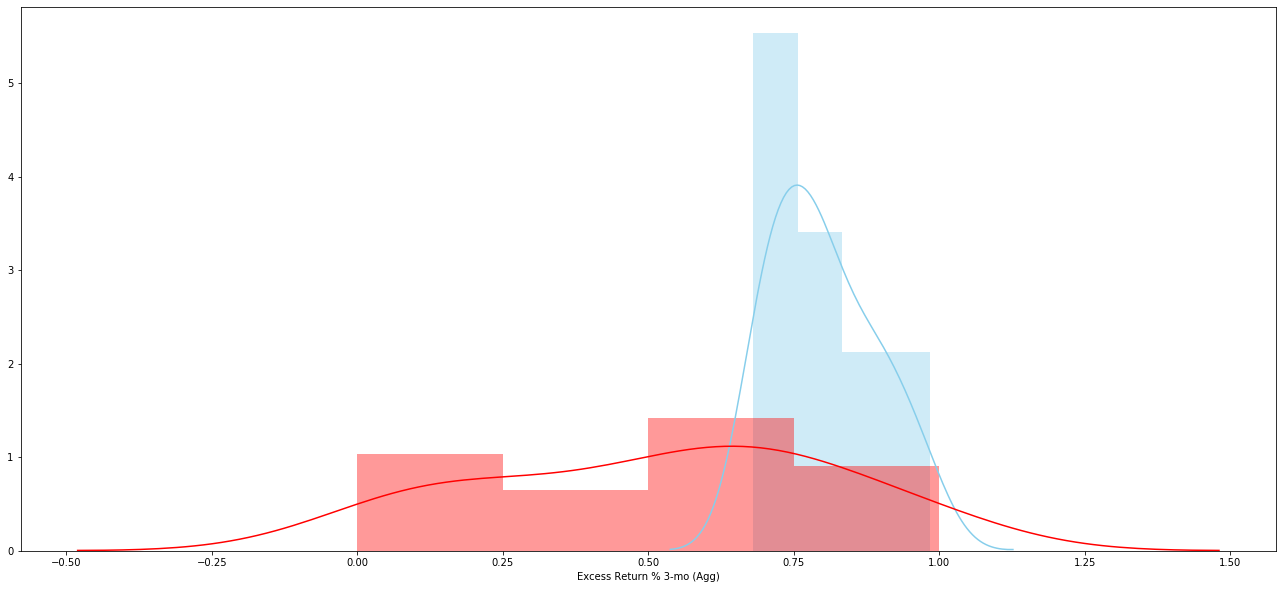

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 6-mo (Treasury)  31.0  0.603023  0.307843  0.055290   
 2                         combined  62.0  0.702325  0.246082  0.031252   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.490105  0.715941  
 2   0.639832  0.764818  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.1986
 1                              Degrees of freedom =   60.0000
 2                                               t =    3.4496
 3                           Two side test p value =    0.0010
 4                          Difference < 0 p value =    0.9995
 5                          Difference > 0 p value =    0.0005
 6                                       Cohen's d =    0.8762
 7                                       Hedge's g =    0.8652
 8                        

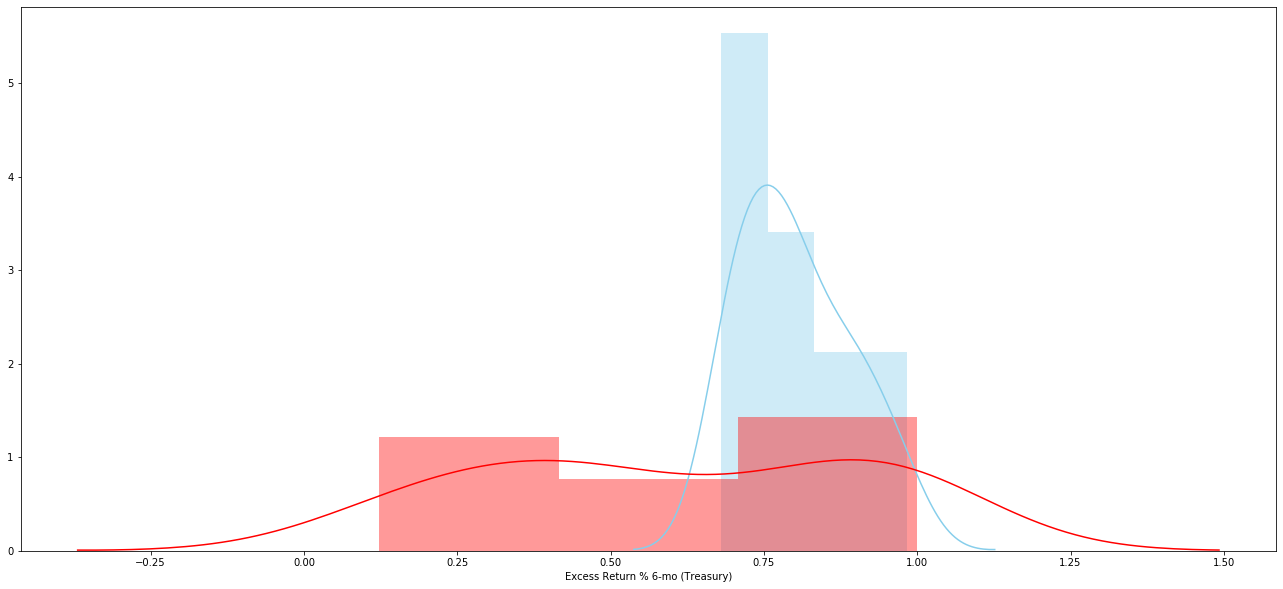

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 6-mo (Agg)  31.0  0.504556  0.363760  0.065333   0.371128   
 2                    combined  62.0  0.653092  0.302370  0.038401   0.576304   
 
    Interval  
 0  0.834403  
 1  0.637985  
 2  0.729879  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.2971
 1                             Degrees of freedom =   60.0000
 2                                              t =    4.4157
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.1216
 7                                      Hedge's g =    1.1075
 8                                  Glass's delta =    

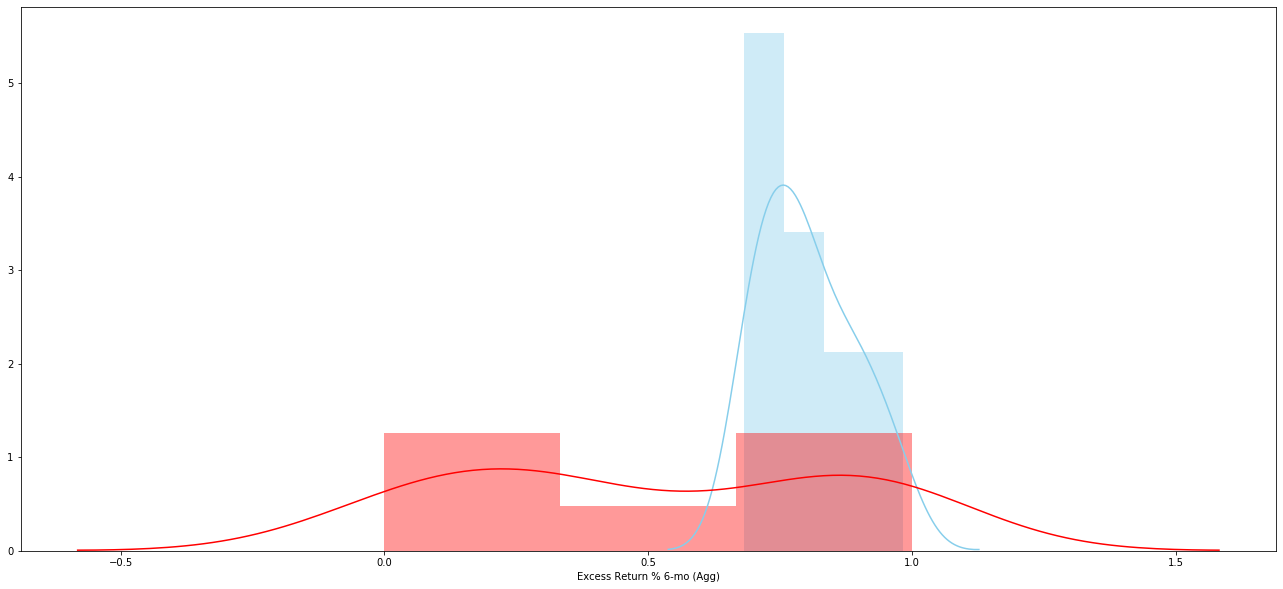

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 9-mo (Treasury)  31.0  0.604966  0.273750  0.049167   
 2                         combined  62.0  0.703296  0.224965  0.028571   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.504553  0.705378  
 2   0.646166  0.760427  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.1967
 1                              Degrees of freedom =   60.0000
 2                                               t =    3.8024
 3                           Two side test p value =    0.0003
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.9658
 7                                       Hedge's g =    0.9537
 8                        

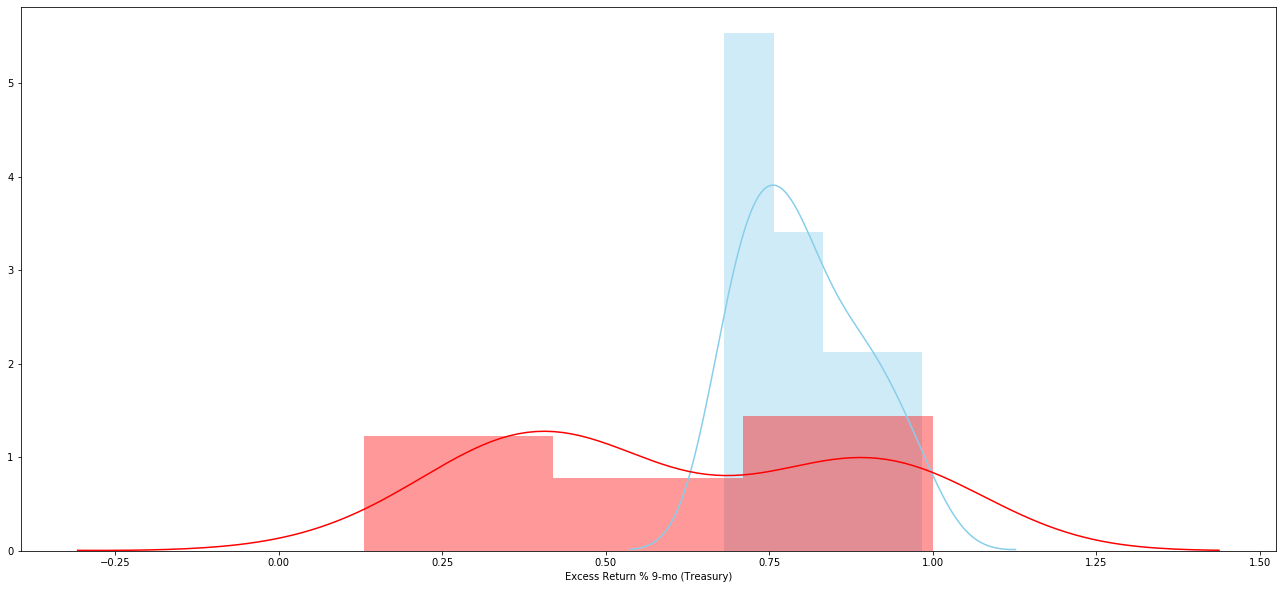

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 9-mo (Agg)  31.0  0.490998  0.329836  0.059240   0.370013   
 2                    combined  62.0  0.646312  0.286267  0.036356   0.573614   
 
    Interval  
 0  0.834403  
 1  0.611983  
 2  0.719011  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.3106
 1                             Degrees of freedom =   60.0000
 2                                              t =    5.0611
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2855
 7                                      Hedge's g =    1.2694
 8                                  Glass's delta =    

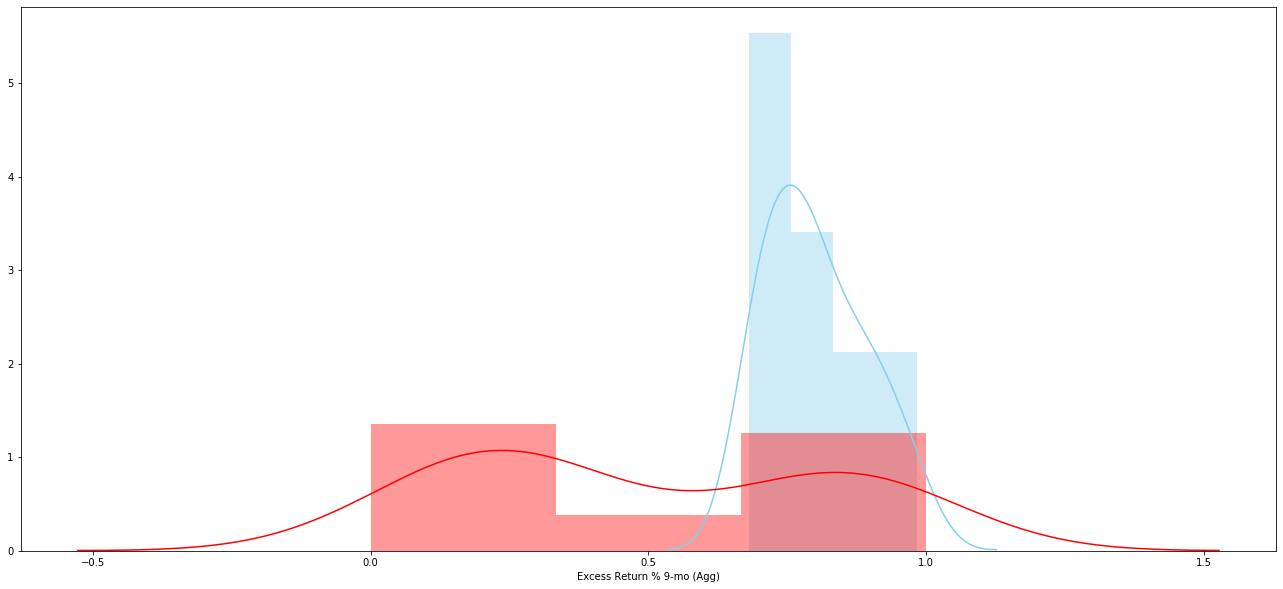

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 12-mo (Treasury)  31.0  0.588132  0.302312  0.054297   
 2                          combined  62.0  0.694879  0.245878  0.031226   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.477243  0.699021  
 2   0.632438  0.757320  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2135
 1                              Degrees of freedom =   60.0000
 2                                               t =    3.7707
 3                           Two side test p value =    0.0004
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.9578
 7                                       Hedge's g =    0.9457
 8                    

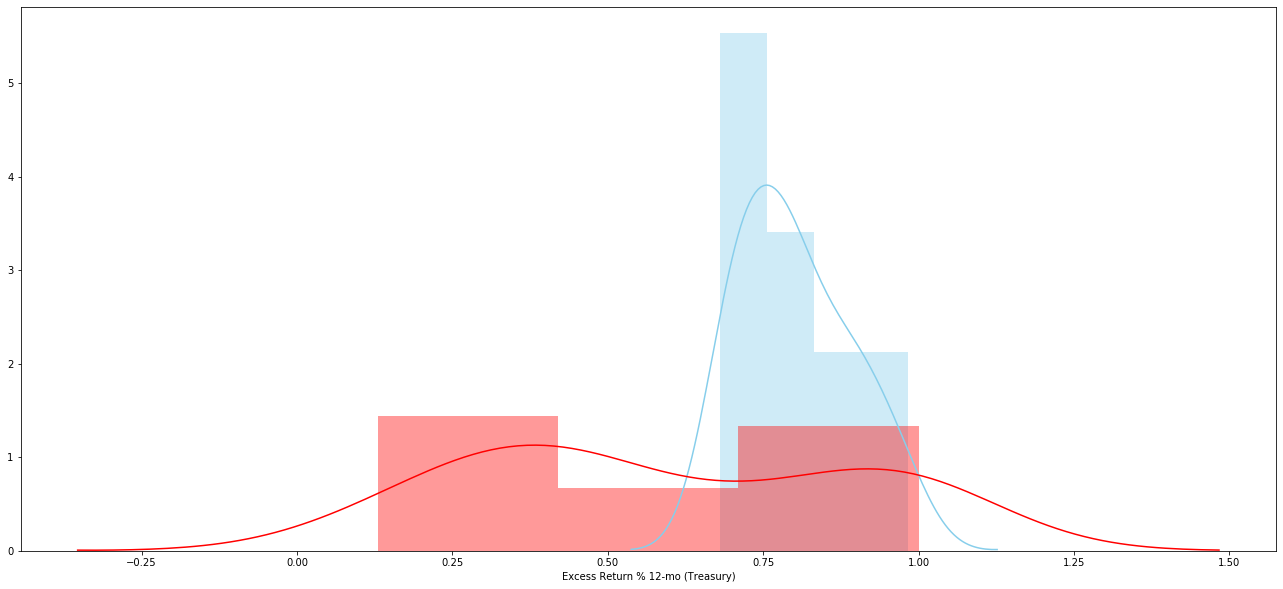

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 12-mo (Agg)  31.0  0.452058  0.368555  0.066194   0.316871   
 2                     combined  62.0  0.626842  0.319030  0.040517   0.545824   
 
    Interval  
 0  0.834403  
 1  0.587245  
 2  0.707861  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.3496
 1                              Degrees of freedom =   60.0000
 2                                               t =    5.1323
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3036
 7                                       Hedge's g =    1.2872
 8                                   Glass

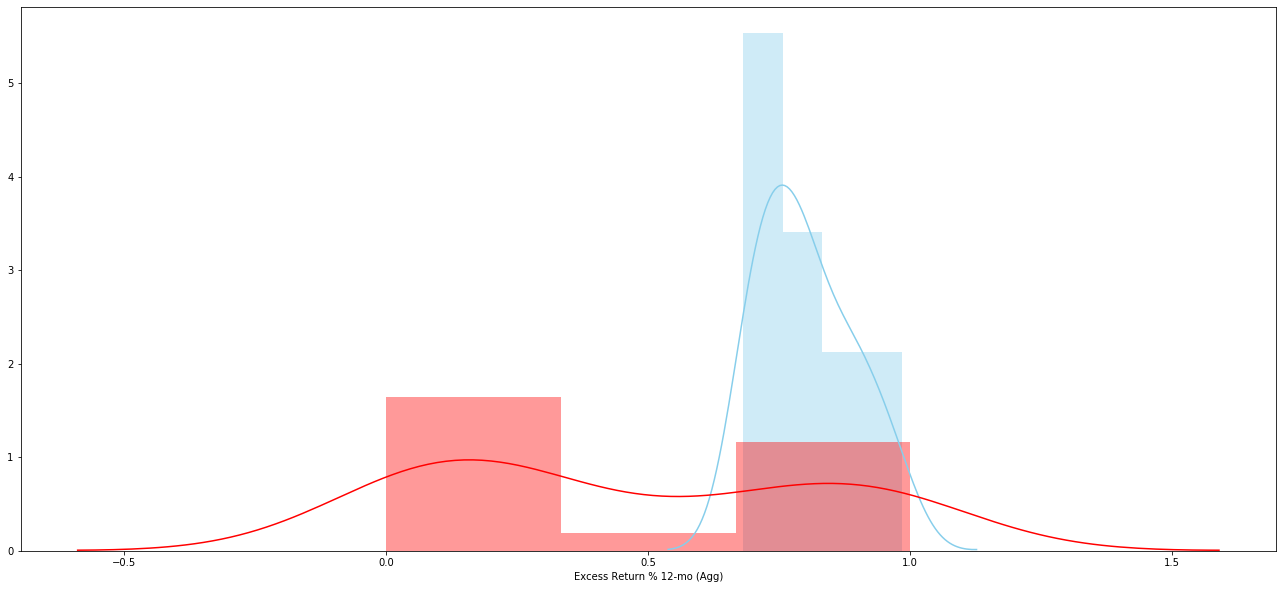

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 24-mo (Treasury)  31.0  0.552979  0.243993  0.043822   
 2                          combined  62.0  0.677303  0.221167  0.028088   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.463482  0.642476  
 2   0.621137  0.733469  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2486
 1                              Degrees of freedom =   60.0000
 2                                               t =    5.3279
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3533
 7                                       Hedge's g =    1.3363
 8                    

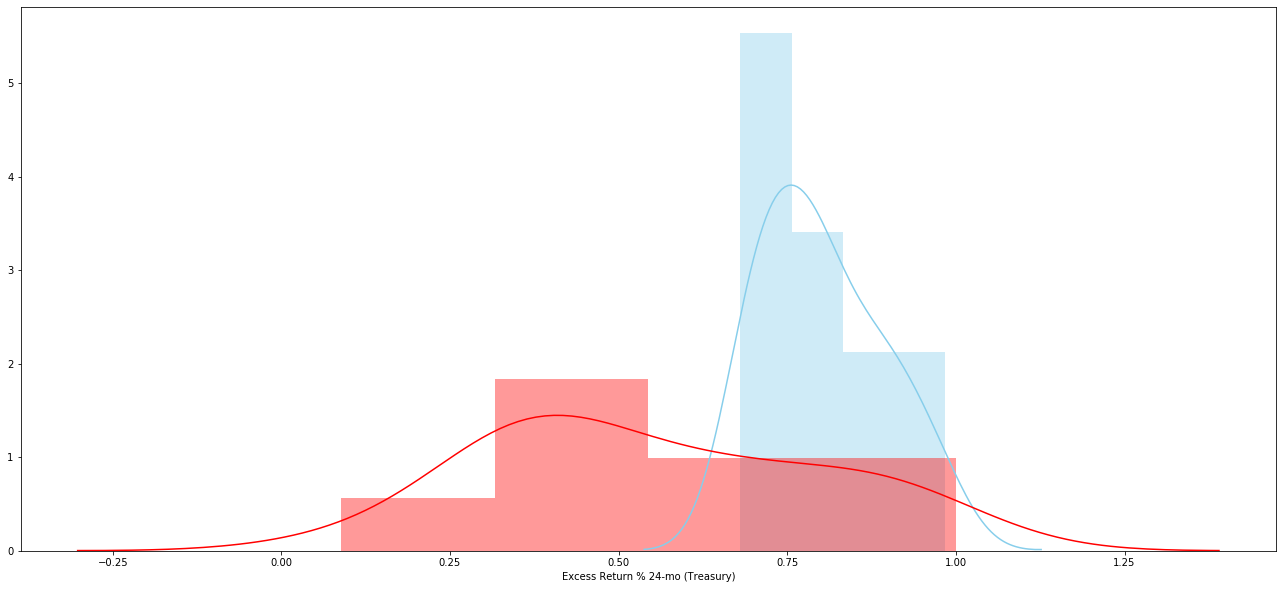

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 24-mo (Agg)  31.0  0.362894  0.360582  0.064762   0.230632   
 2                     combined  62.0  0.582260  0.341733  0.043400   0.495477   
 
    Interval  
 0  0.834403  
 1  0.495157  
 2  0.669044  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.4387
 1                              Degrees of freedom =   60.0000
 2                                               t =    6.5756
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6702
 7                                       Hedge's g =    1.6492
 8                                   Glass

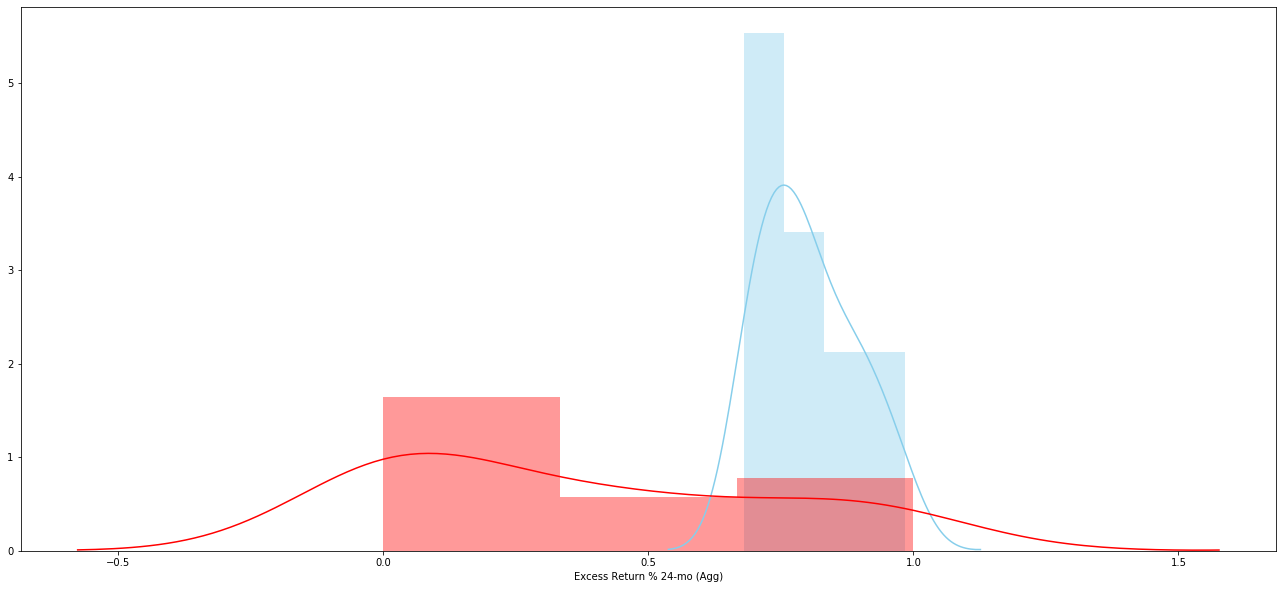

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 36-mo (Treasury)  31.0  0.632225  0.259268  0.046566   
 2                          combined  62.0  0.716926  0.210423  0.026724   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.537125  0.727326  
 2   0.663489  0.770363  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.1694
 1                              Degrees of freedom =   60.0000
 2                                               t =    3.4393
 3                           Two side test p value =    0.0011
 4                          Difference < 0 p value =    0.9995
 5                          Difference > 0 p value =    0.0005
 6                                       Cohen's d =    0.8736
 7                                       Hedge's g =    0.8626
 8                    

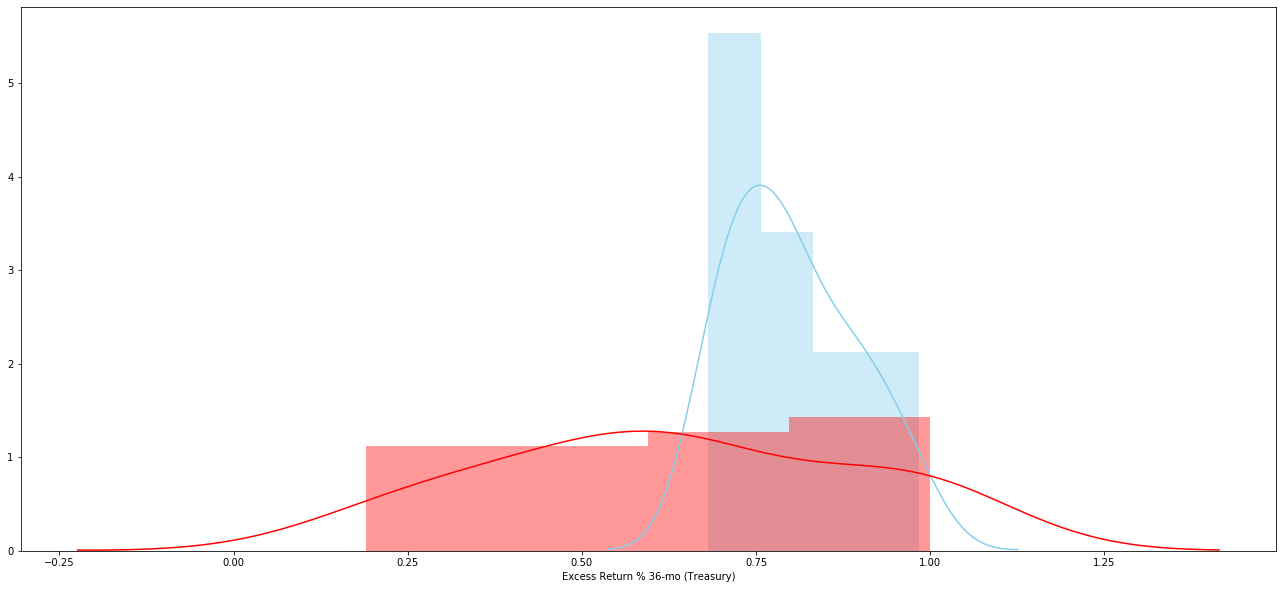

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 36-mo (Agg)  31.0  0.396666  0.345999  0.062143   0.269752   
 2                     combined  62.0  0.599146  0.323224  0.041049   0.517063   
 
    Interval  
 0  0.834403  
 1  0.523579  
 2  0.681230  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.4050
 1                              Degrees of freedom =   60.0000
 2                                               t =    6.3096
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6026
 7                                       Hedge's g =    1.5825
 8                                   Glass

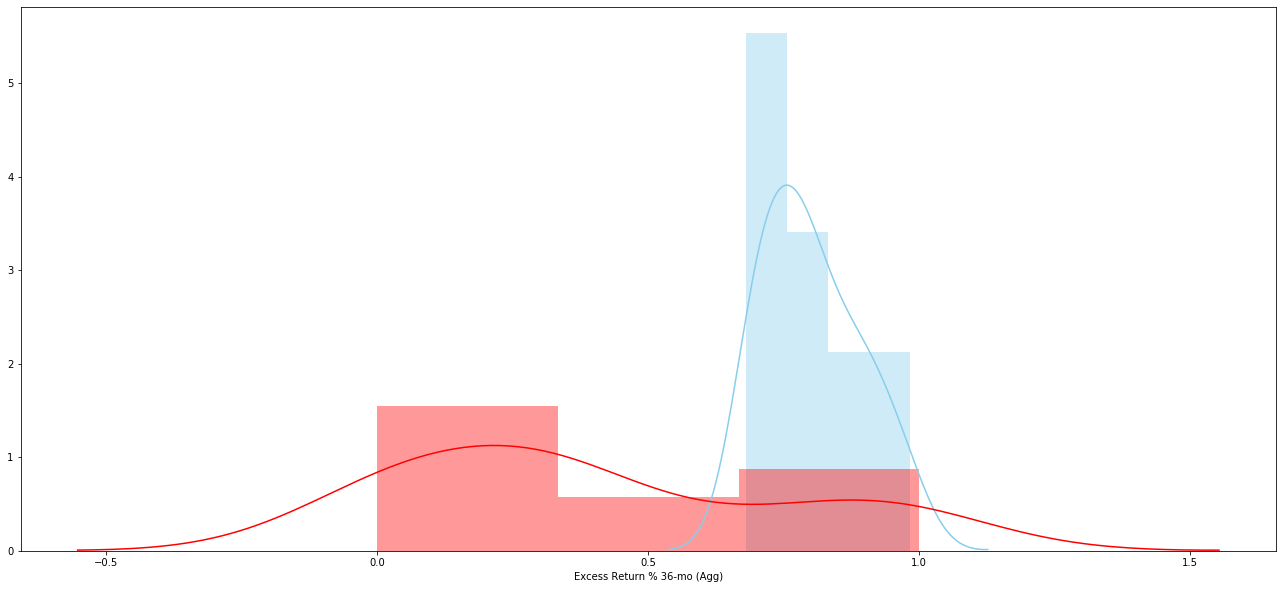

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,256.000000,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.498948,0.495798,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.218167,0.231360,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.508152,0.508637,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 3-mo (Treasury)  254.0  0.497792  0.209246  0.013129   
 2                         combined  285.0  0.530841  0.220972  0.013089   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.471936  0.523649  
 2   0.505077  0.556605  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.3038
 1                              Degrees of freedom =   283.0000
 2                                               t =     7.9863
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5194
 7                                       Hedge's g =     1.5154
 8           

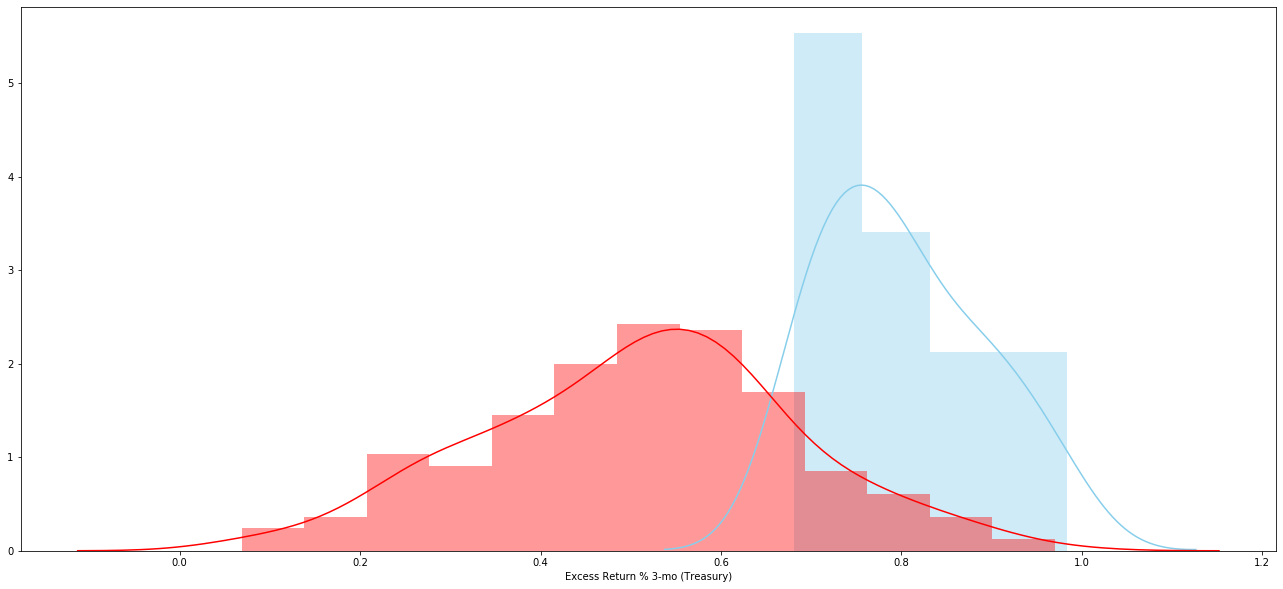

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 3-mo (Agg)  254.0  0.493628  0.211150  0.013249   0.467536   
 2                    combined  285.0  0.527130  0.223136  0.013217   0.501113   
 
    Interval  
 0  0.834403  
 1  0.519720  
 2  0.553146  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.3080
 1                             Degrees of freedom =   283.0000
 2                                              t =     8.0242
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5266
 7                                      Hedge's g =     1.5226
 8                                  Glass'

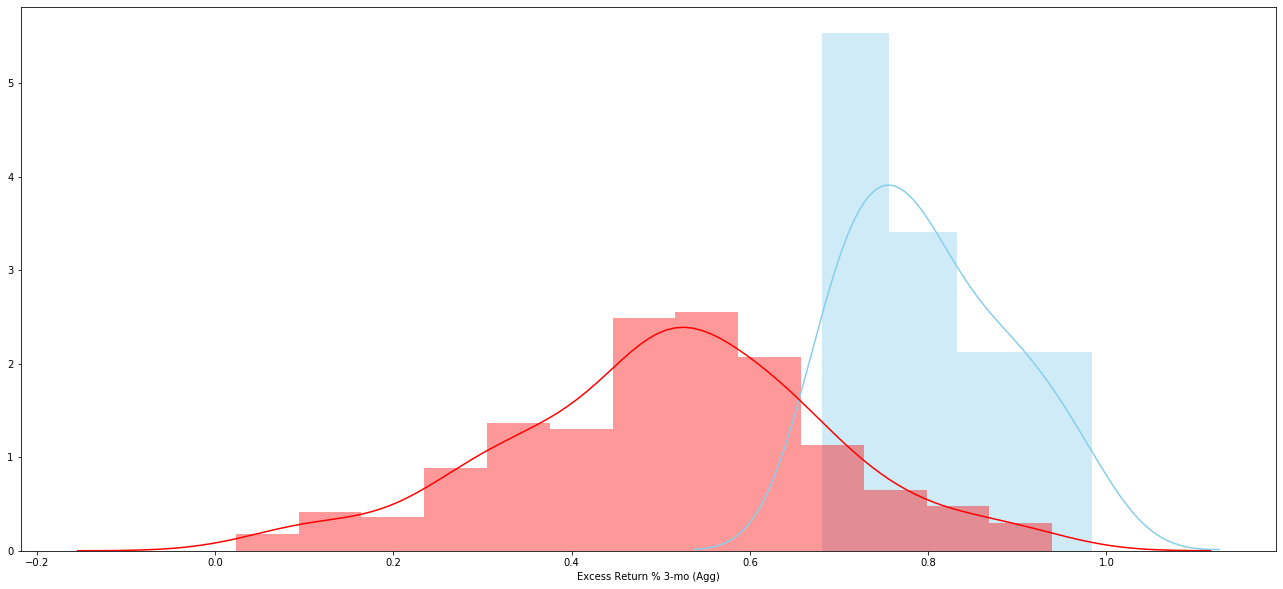

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 6-mo (Treasury)  251.0  0.511375  0.233158  0.014717   
 2                         combined  282.0  0.543282  0.239771  0.014278   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.482390  0.540359  
 2   0.515176  0.571387  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2903
 1                              Degrees of freedom =   280.0000
 2                                               t =     6.8601
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3060
 7                                       Hedge's g =     1.3025
 8           

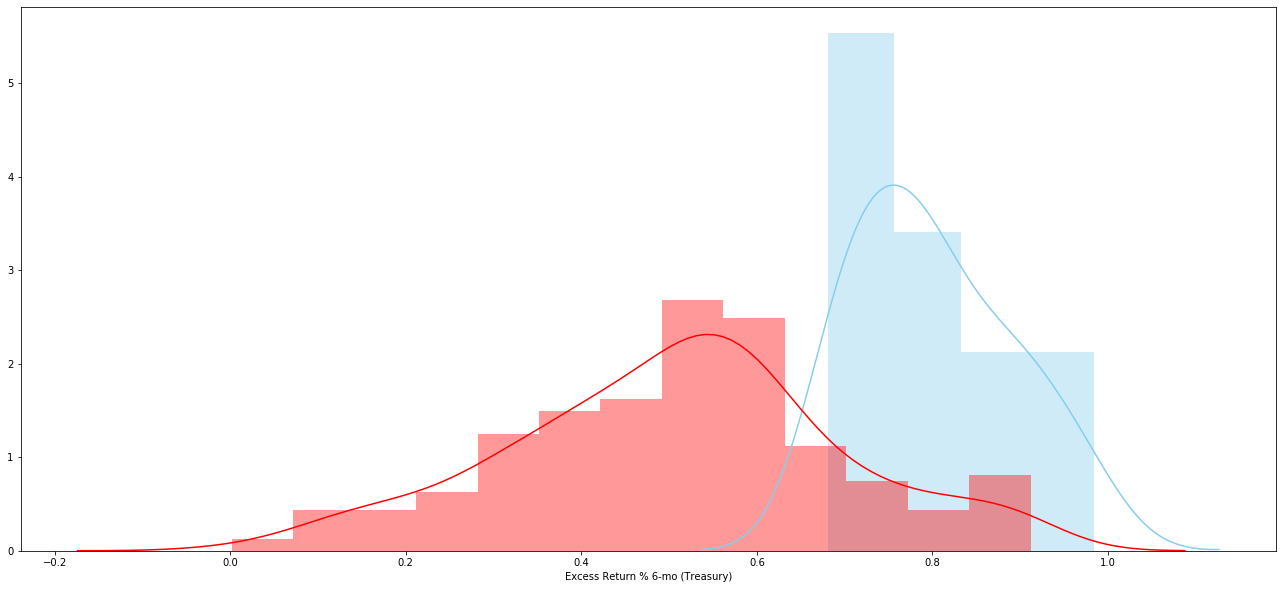

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 6-mo (Agg)  251.0  0.500867  0.229447  0.014483   0.472343   
 2                    combined  282.0  0.533929  0.237850  0.014164   0.506048   
 
    Interval  
 0  0.834403  
 1  0.529390  
 2  0.561809  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.3008
 1                             Degrees of freedom =   280.0000
 2                                              t =     7.2214
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3748
 7                                      Hedge's g =     1.3711
 8                                  Glass'

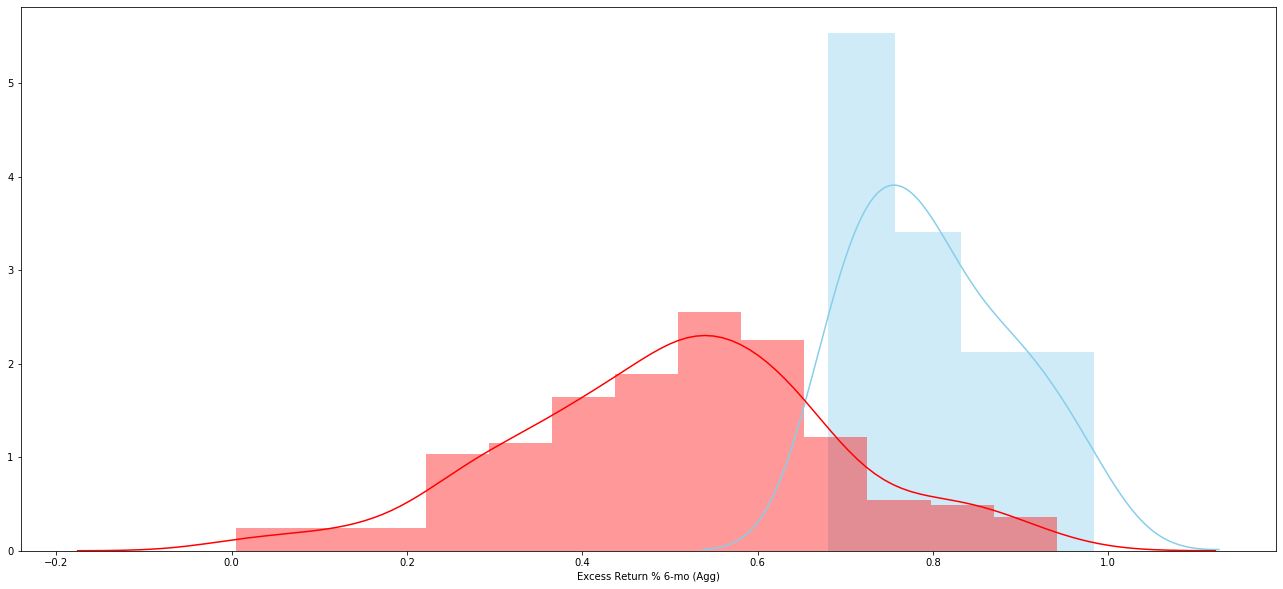

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 9-mo (Treasury)  248.0  0.512766  0.213667  0.013568   
 2                         combined  279.0  0.544861  0.222924  0.013346   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.486042  0.539489  
 2   0.518589  0.571134  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2889
 1                              Degrees of freedom =   277.0000
 2                                               t =     7.4367
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4167
 7                                       Hedge's g =     1.4129
 8           

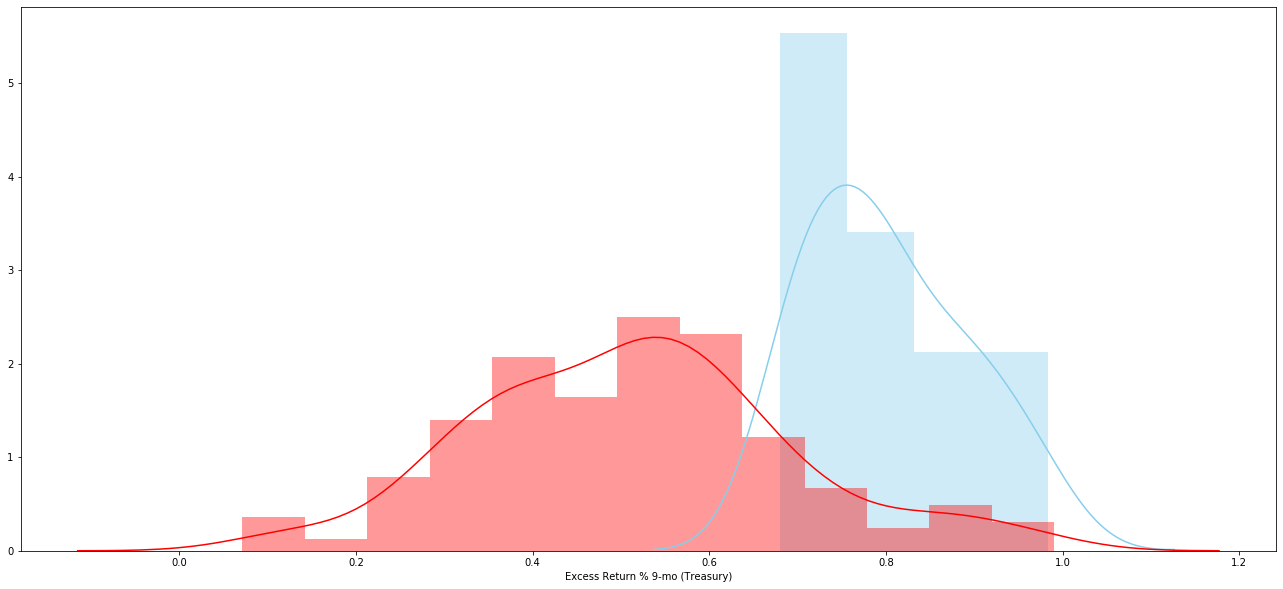

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   31.0  0.801627  0.089356  0.016049   0.768851   
 1  Excess Return % 9-mo (Agg)  248.0  0.497830  0.212037  0.013464   0.471310   
 2                    combined  279.0  0.531585  0.223509  0.013381   0.505244   
 
    Interval  
 0  0.834403  
 1  0.524350  
 2  0.557926  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.3038
 1                             Degrees of freedom =   277.0000
 2                                              t =     7.8801
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5012
 7                                      Hedge's g =     1.4971
 8                                  Glass'

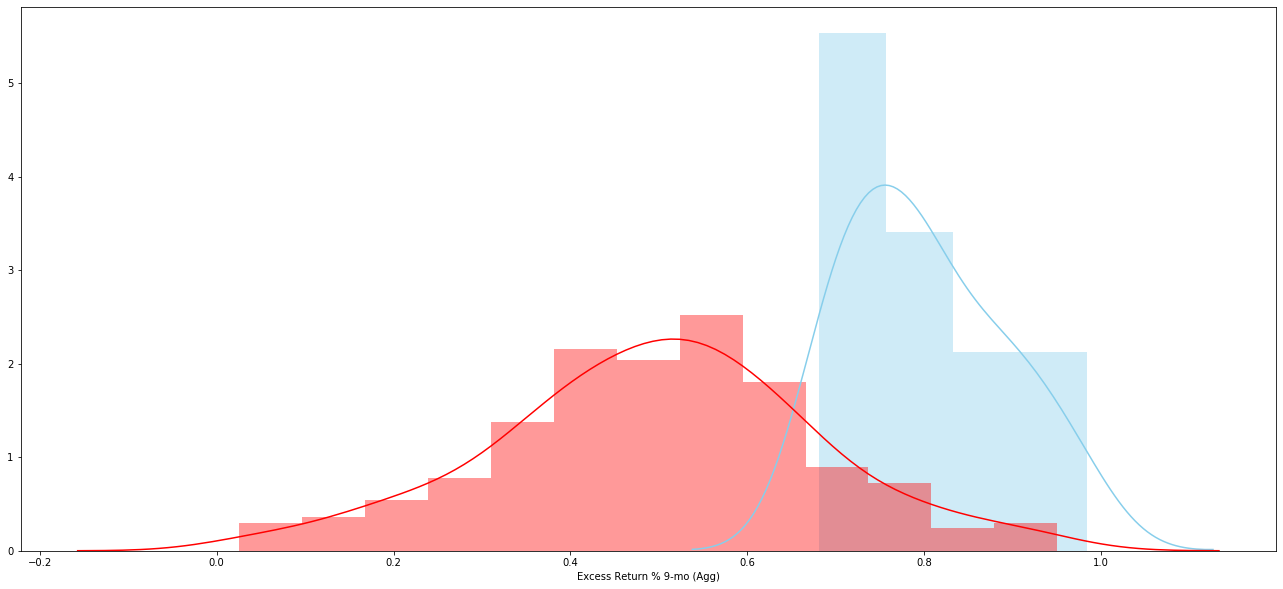

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 12-mo (Treasury)  245.0  0.507787  0.227149  0.014512   
 2                          combined  276.0  0.540791  0.235141  0.014154   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.479203  0.536372  
 2   0.512927  0.568655  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2938
 1                              Degrees of freedom =   274.0000
 2                                               t =     7.1236
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3580
 7                                       Hedge's g =     1.3542
 8       

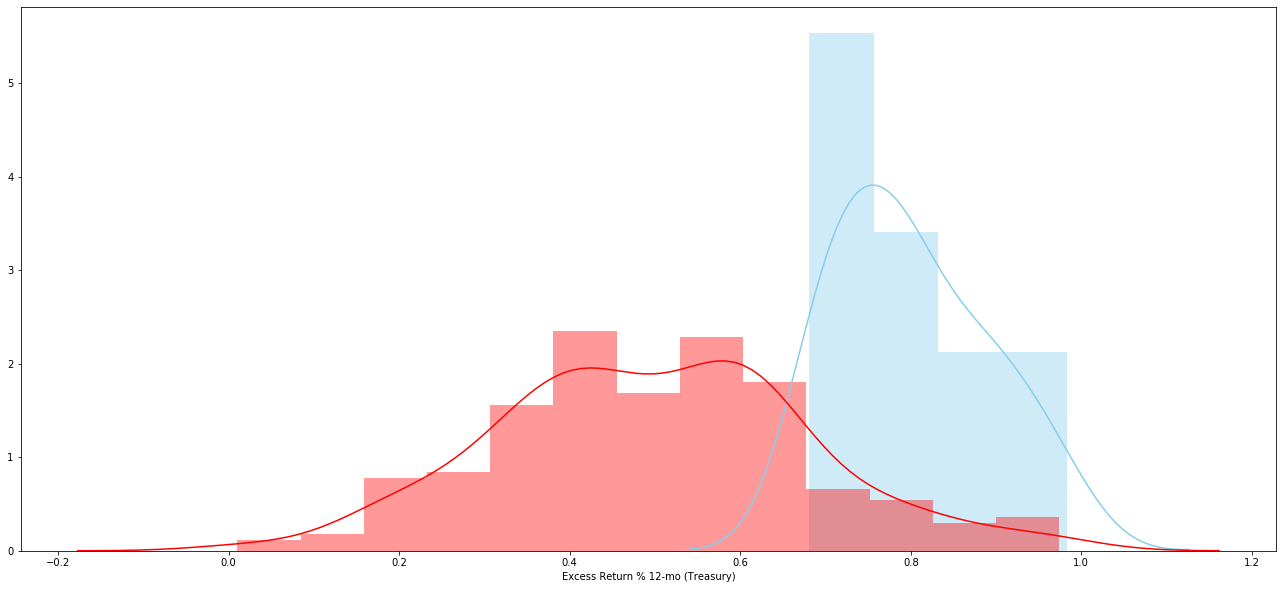

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 12-mo (Agg)  245.0  0.495017  0.227807  0.014554   
 2                     combined  276.0  0.529455  0.237327  0.014285   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.466349  0.523684  
 2   0.501332  0.557577  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.3066
 1                              Degrees of freedom =   274.0000
 2                                               t =     7.4121
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4130
 7                                       Hedge's g =     1.4091
 8                           

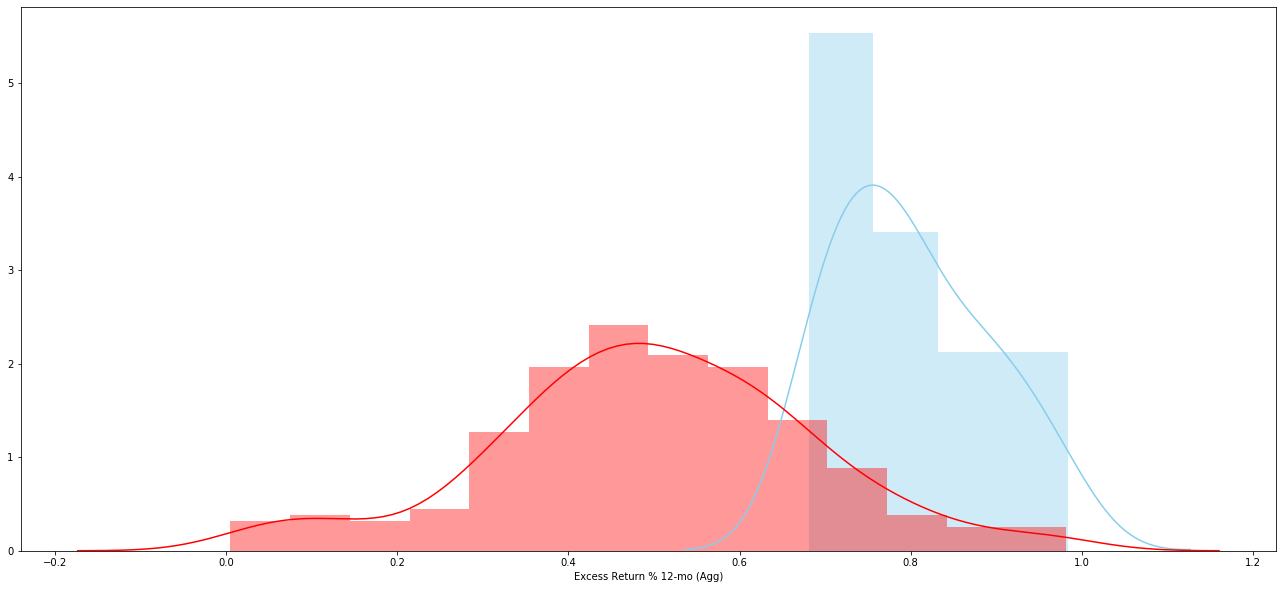

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 24-mo (Treasury)  233.0  0.500095  0.200797  0.013155   
 2                          combined  264.0  0.535502  0.214328  0.013191   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.474177  0.526013  
 2   0.509529  0.561475  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.3015
 1                              Degrees of freedom =   262.0000
 2                                               t =     8.2423
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5758
 7                                       Hedge's g =     1.5712
 8       

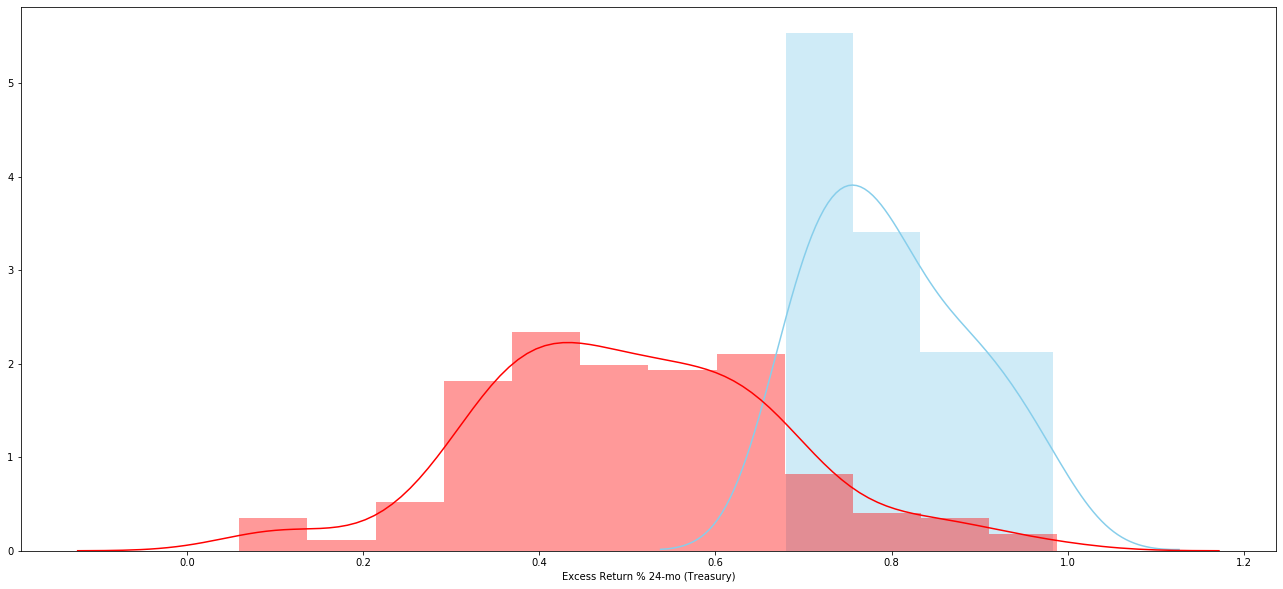

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 24-mo (Agg)  233.0  0.487434  0.234734  0.015378   
 2                     combined  264.0  0.524328  0.244511  0.015049   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.457135  0.517732  
 2   0.494696  0.553959  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3142
 1                              Degrees of freedom =   262.0000
 2                                               t =     7.3715
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4093
 7                                       Hedge's g =     1.4052
 8                           

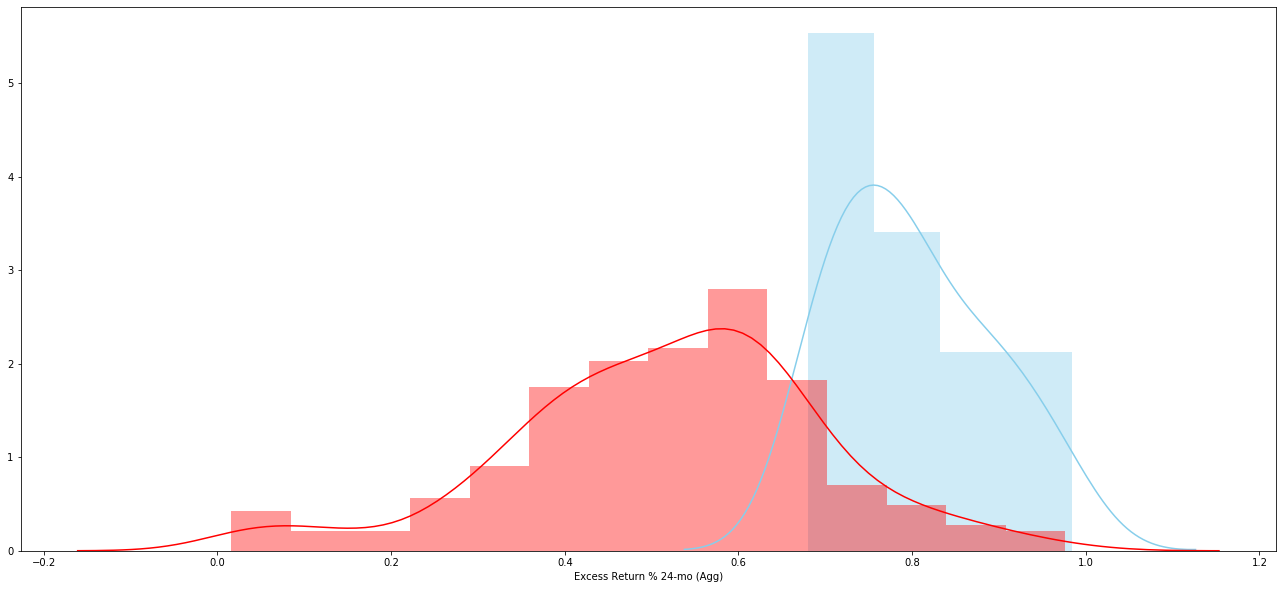

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 36-mo (Treasury)  221.0  0.504781  0.244943  0.016477   
 2                          combined  252.0  0.541298  0.251168  0.015822   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.472309  0.537254  
 2   0.510137  0.572459  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2968
 1                              Degrees of freedom =   250.0000
 2                                               t =     6.6757
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2803
 7                                       Hedge's g =     1.2765
 8       

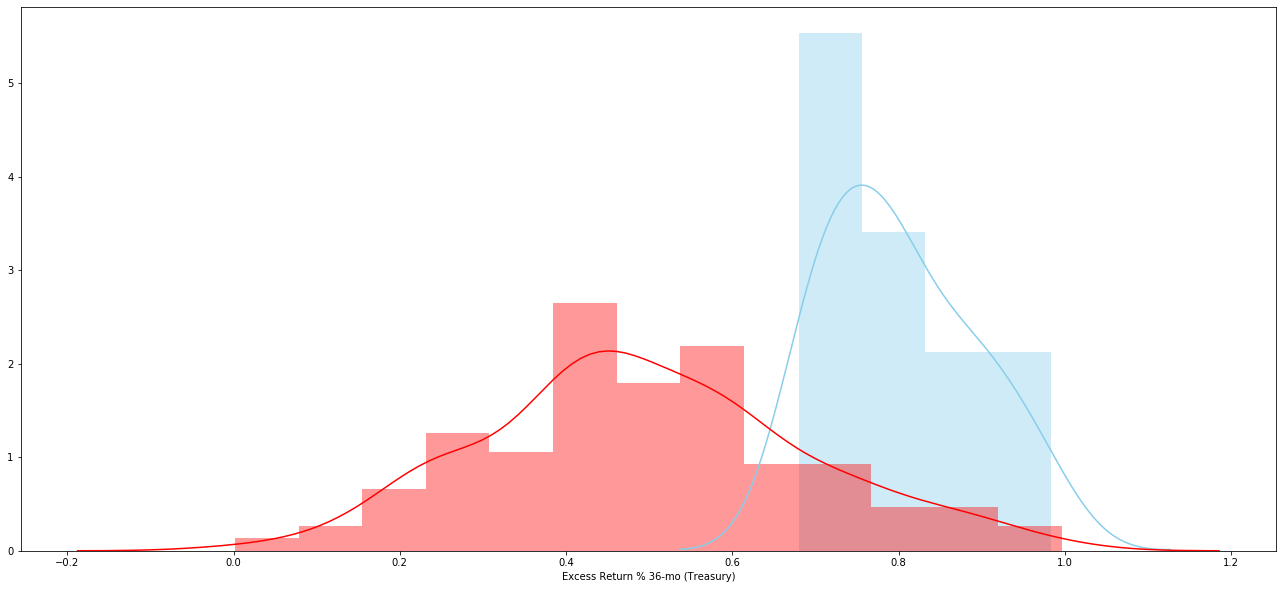

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   31.0  0.801627  0.089356  0.016049   
 1  Excess Return % 36-mo (Agg)  221.0  0.497593  0.232889  0.015666   
 2                     combined  252.0  0.534994  0.241878  0.015237   
 
    95% Conf.  Interval  
 0   0.768851  0.834403  
 1   0.466719  0.528467  
 2   0.504986  0.565002  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3040
 1                              Degrees of freedom =   250.0000
 2                                               t =     7.1844
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3779
 7                                       Hedge's g =     1.3738
 8                           

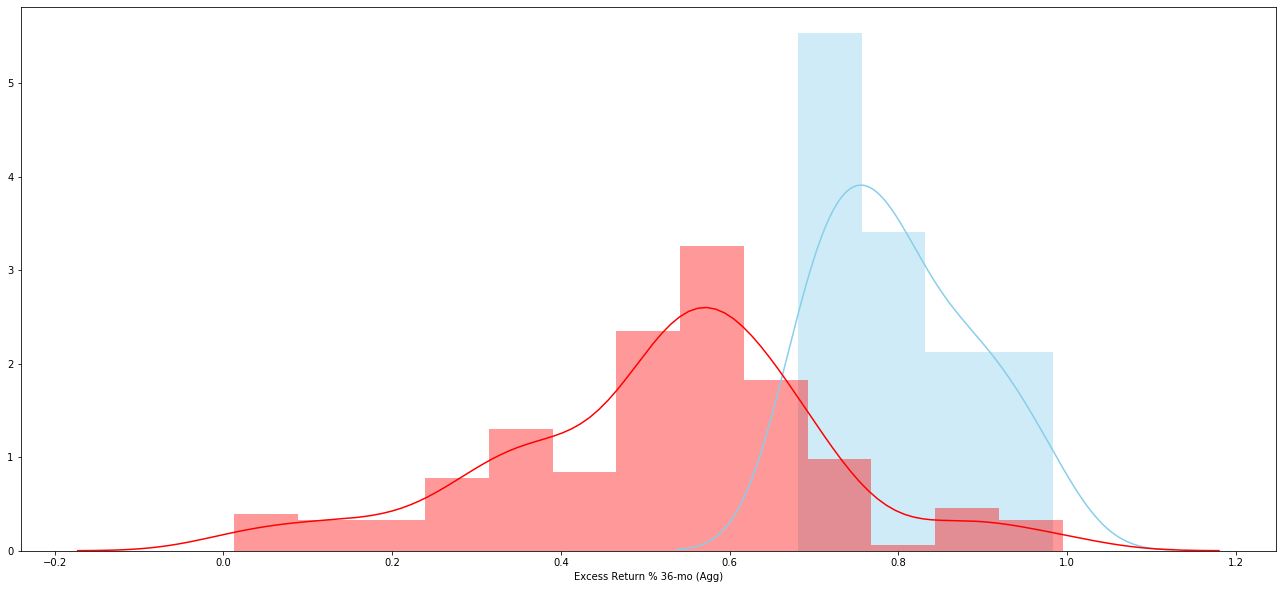

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")